In [1]:
#!pip install mlxtend

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 연령대별 그룹화

In [27]:
import pandas as pd

df_clean = pd.read_csv("./data/df_clean.csv") 
df_clean

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,OrderHour,OrderMinute,OrderSecond,ItemCode,ItemLargeName,ItemMiddleName,ItemSmallName,ItemName,Price,PriceYear,PriceMin,PriceMax,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,17,8,51,L4-M17-S0530-1024,신선식품,수산,전복,완도 활전복 1kg 중 22-25미,33310,2022,33160,37070,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,17,8,51,L1-M21-S0540-1082,가공식품,즉석,즉석,동원 양반 차돌된장찌개 (460G),3780,2022,3690,3970,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,17,8,51,L1-M15-S0140-1311,가공식품,냉동,냉동,오뚜기 듬뿍 새우볶음밥450g (2인분) x 5봉지 /,22520,2022,22150,23150,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,17,8,51,L4-M12-S0350-1035,신선식품,과일,사과,[산지직송] 새콤달콤 부사 사과 5kg (13과내),21630,2022,20810,23030,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,16,50,14,L4-M12-S0640-1057,신선식품,과일,토마토,스테비아 방울 토마토 라루 토망고 1kg,11700,2022,11640,13020,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856722,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,14,6,13,L4-M12-S0350-1063,신선식품,과일,사과,경북 부사사과 가정용 한입 1.5kg 11과내,11520,2024,11100,11900,2024-12-27 04:23:00,2024,12,27,4,23,0,0 days 14:17:00,14.283333,1
856723,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,14,6,13,L1-M12-S0330-1011,가공식품,과일,블루베리,국산 냉동 블루베리 1kg,18870,2024,18820,20180,2024-12-27 04:23:00,2024,12,27,4,23,0,0 days 14:17:00,14.283333,1
856724,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,14,6,13,L1-M21-S0540-1161,가공식품,즉석,즉석,오뚜기 어린이 카레 80G,3120,2024,3080,3300,2024-12-27 04:23:00,2024,12,27,4,23,0,0 days 14:17:00,14.283333,1
856725,U13000,여성,30,30대,1,N,U13000-O2024-1008,2024-12-26 14:06:00,12,26,14,6,13,L1-M17-S0030-1016,가공식품,수산,고등어,[왕특대] 이동삼 안동 간고등어 140gX20팩,37760,2024,35420,37980,2024-12-27 04:23:00,2024,12,27,4,23,0,0 days 14:17:00,14.283333,1


In [31]:
import pandas as pd

# 열 최대 개수 무제한으로 설정
pd.set_option('display.max_columns', None)

# (선택) 너비도 넉넉하게 설정해서 잘림 방지
pd.set_option('display.width', None)

# (선택) 한 줄에 너무 많은 데이터가 붙지 않게 colwidth도 설정 가능
pd.set_option('display.max_colwidth', None)  # 또는 pd.set_option('display.max_colwidth', -1) (버전별 차이 있음)
print(df_clean.columns)

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


In [33]:
# 컬럼 목록 출력
print("📋 현재 포함된 컬럼 목록:")
for col in df_clean.columns:
    print(f"- {col}")

📋 현재 포함된 컬럼 목록:
- idUser
- Gender
- Age
- AgeGroup
- FamilyCount
- MemberYN
- idOrder
- OrderDT
- OrderMonth
- OrderDay
- OrderHour
- OrderMinute
- OrderSecond
- ItemCode
- ItemLargeName
- ItemMiddleName
- ItemSmallName
- ItemName
- Price
- PriceYear
- PriceMin
- PriceMax
- DeliveryDT
- Deli_Year
- Deli_Month
- Deli_Day
- Deli_Hour
- Deli_Minute
- Deli_Second
- Deli_Duration
- Deli_Hours
- IsMorningDelivery


# 연관분석용

In [35]:
import pandas as pd

# CSV 파일 불러오기
#df = pd.read_csv("./data/df_merged.csv")  # 파일 경로는 적절히 수정해줘

# 주문별 합계: 고객-ID + 주문-ID별 총 금액 계산
order_summary = df_clean.groupby(['idUser', 'idOrder'])['Price'].sum().reset_index()

# 고객별 요약 통계 계산
user_summary = order_summary.groupby('idUser').agg(
    order_count=('idOrder', 'nunique'),   # 주문 수
    total_spent=('Price', 'sum'),         # 총 주문 금액
    avg_order_value=('Price', 'mean')     # 평균 1회 주문 금액
).reset_index()

# 결과 미리보기
user_summary

,idUser,order_count,total_spent,avg_order_value
0,U10001,69,5414990,78478.115942
1,U10002,53,3966700,74843.396226
2,U10003,53,4759100,89794.339623
3,U10004,33,2498420,75709.696970
4,U10005,78,5563770,71330.384615
...,...,...,...,...
2995,U12996,20,2070760,103538.000000
2996,U12997,67,5184790,77384.925373
2997,U12998,56,4246570,75831.607143
2998,U12999,55,4799980,87272.363636


In [39]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

AgeGroup = df_clean['AgeGroup'].dropna().unique()

# 연령대별 연관분석 결과 저장 리스트
all_rules = []

for group in AgeGroup:
    # 해당 연령대만 필터링
    df_age = df_clean[df_clean['AgeGroup'] == group]

    # 주문 단위로 상품 리스트 만들기
    basket = df_age.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

    # One-hot 인코딩
    te = TransactionEncoder()
    te_ary = te.fit(basket['ItemSmallName']).transform(basket['ItemSmallName'])
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    # 자주 나오는 상품 조합 찾기
    frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

    # 연관 규칙 추출
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    # 연령대 정보 추가
    rules['Agegroup'] = group

    # 리스트에 추가
    all_rules.append(rules)

# 연령대별 결과 통합
result_df = pd.concat(all_rules, ignore_index=True)

# 상위 20개 예시 출력 (lift 높은 순)
result_df[['Agegroup', 'antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(20)


,Agegroup,antecedents,consequents,support,confidence,lift
1256,60대,(커피),"(사과, 낙지)",0.005220,0.034728,1.508465
1253,60대,"(사과, 낙지)",(커피),0.005220,0.226744,1.508465
1377,60대,(라면),"(사과, 토마토)",0.005889,0.058902,1.476708
1374,60대,"(사과, 토마토)",(라면),0.005889,0.147651,1.476708
888,60대,(멸치),(호박),0.009637,0.185567,1.454744
889,60대,(호박),(멸치),0.009637,0.075551,1.454744
1051,60대,(조미료),(파),0.005488,0.172269,1.454261
1050,60대,(파),(조미료),0.005488,0.046328,1.454261
1014,60대,(소시지),(풋고추),0.005220,0.097015,1.452502
1015,60대,(풋고추),(소시지),0.005220,0.078156,1.452502


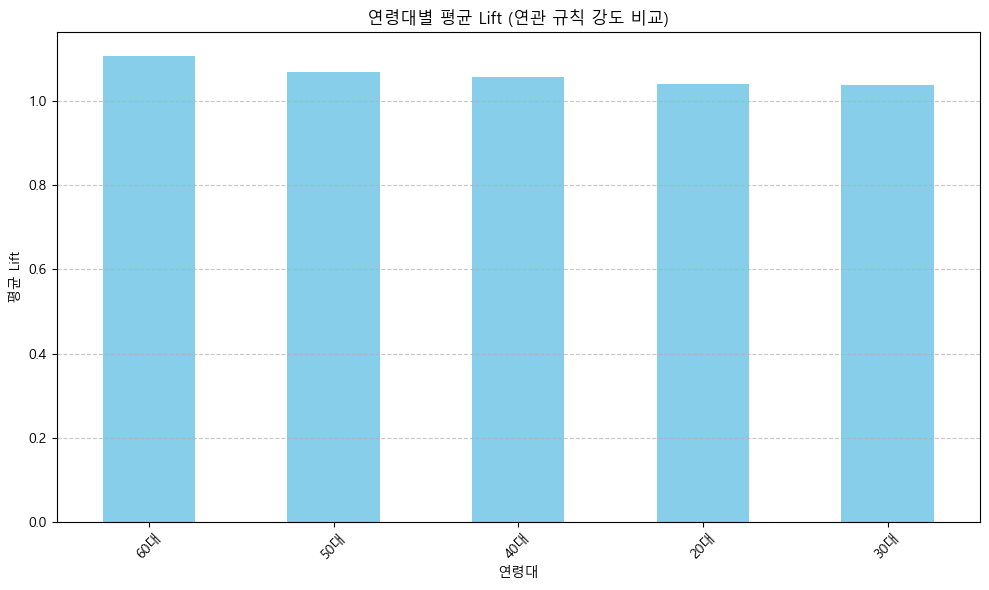

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 연령대 리스트
age_groups = df_clean['AgeGroup'].dropna().unique()

# 연관분석 진행
all_rules = []

for group in age_groups:
    df_age = df_clean[df_clean['AgeGroup'] == group]
    basket = df_age.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

    te = TransactionEncoder()
    te_ary = te.fit(basket['ItemSmallName']).transform(basket['ItemSmallName'])
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    rules['AgeGroup'] = group  # 여기도 컬럼명 맞춰줘야 해

    all_rules.append(rules)

# 연령대별 결과 통합
result_df = pd.concat(all_rules, ignore_index=True)

# 📊 연령대별 평균 lift 시각화
avg_lift_by_age = result_df.groupby('AgeGroup')['lift'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_lift_by_age.plot(kind='bar', color='skyblue')
plt.title('연령대별 평균 Lift (연관 규칙 강도 비교)')
plt.ylabel('평균 Lift')
plt.xlabel('연령대')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 지금의 결과는 "60대 이상이 다른 연령대보다 자주 함께 구매하는 조합이 많고, 그 조합들이 의미 있는 연관성을 가진 경우가 많다"는 뜻.
### 절대적으로 고객 수가 많다는 뜻은 아님!

## 20대 데이터만 필터링

In [66]:
df_20s = df_clean[df_clean['AgeGroup'] == '20대']

# 주문별 소분류 상품 리스트로 묶기
basket_20s = df_20s.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# TransactionEncoder로 이진 매트릭스 변환
te = TransactionEncoder()
te_ary = te.fit(basket_20s['ItemSmallName']).transform(basket_20s['ItemSmallName'])
df_encoded_20s = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘 적용
frequent_itemsets_20s = apriori(df_encoded_20s, min_support=0.01, use_colnames=True)

# 연관 규칙 도출
rules_20s = association_rules(frequent_itemsets_20s, metric="lift", min_threshold=1.0)

# 결과 확인
rules_20s = rules_20s.sort_values(by='lift', ascending=False)
rules_20s[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
222,(고구마),"(냉동, 커피)",0.011733,0.051106,1.121551
221,"(냉동, 커피)",(고구마),0.011733,0.257491,1.121551
49,(수박),(김),0.012778,0.167646,1.120734
48,(김),(수박),0.012778,0.085425,1.120734
147,(밤),(호박),0.010026,0.141014,1.106306
146,(호박),(밤),0.010026,0.078661,1.106306
189,(커피),(수박),0.013162,0.084209,1.104782
188,(수박),(커피),0.013162,0.172684,1.104782
218,"(사과, 고구마)",(냉동),0.017856,0.354061,1.098336
219,(냉동),"(사과, 고구마)",0.017856,0.055390,1.098336


In [167]:
# 20대의 소분류별 구매 건수 집계
top_items_20s = df_20s['ItemSmallName'].value_counts().head(10)
print(top_items_20s)

ItemSmallName
냉동     27405
사과     21160
고구마    17929
토마토    16080
김치     14928
즉석     12695
커피     12118
김      11652
고등어    11560
상추     10373
Name: count, dtype: int64


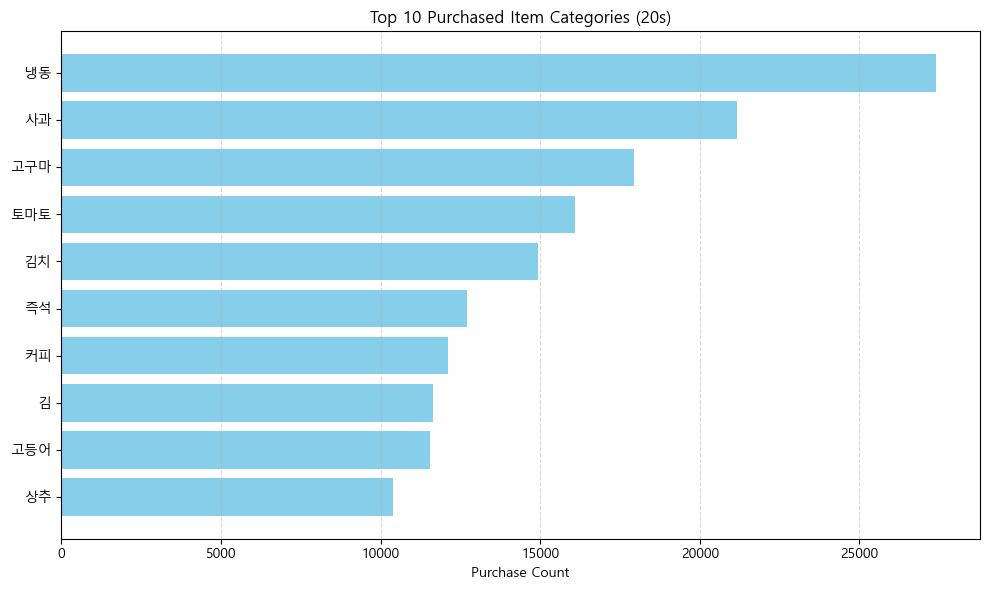

In [169]:
import matplotlib.pyplot as plt

# 시리즈에서 값과 라벨 분리
labels = top_items_20s.index
counts = top_items_20s.values

# 그래프 설정
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Item Categories (20s)')
plt.gca().invert_yaxis()  # 높은 순서가 위로 오도록 반전
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [171]:
# 20대의 소분류별 구매 건수 집계
top_items_20s = df_20s['ItemName'].value_counts().head(10)
print(top_items_20s)

ItemName
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    402
오뚜기 진라면 순한맛 5개입                                      400
D단대전통시장 중앙상회 국산 남해안 마른멸치                             364
완도 활전복 1kg 중 18-20미                                  243
안전한먹거리 냉동 활 낙지 낙지다리 낙지볶음용 1.7kg                      239
[하선정]아삭한 포기김치 1.5kg                                  237
그램원 손질 절단낙지 M/L 430g / 500g 낱개                       235
대상 종가집 전라도 포기김치 3.3kg                                235
유성마린 냉동 활낙지 850g (4미) 냉동낙지 냉동낚지                      234
친환경 완숙토마토 2kg 찰토마토 무농약 스윗 설탕 토마토                     231
Name: count, dtype: int64


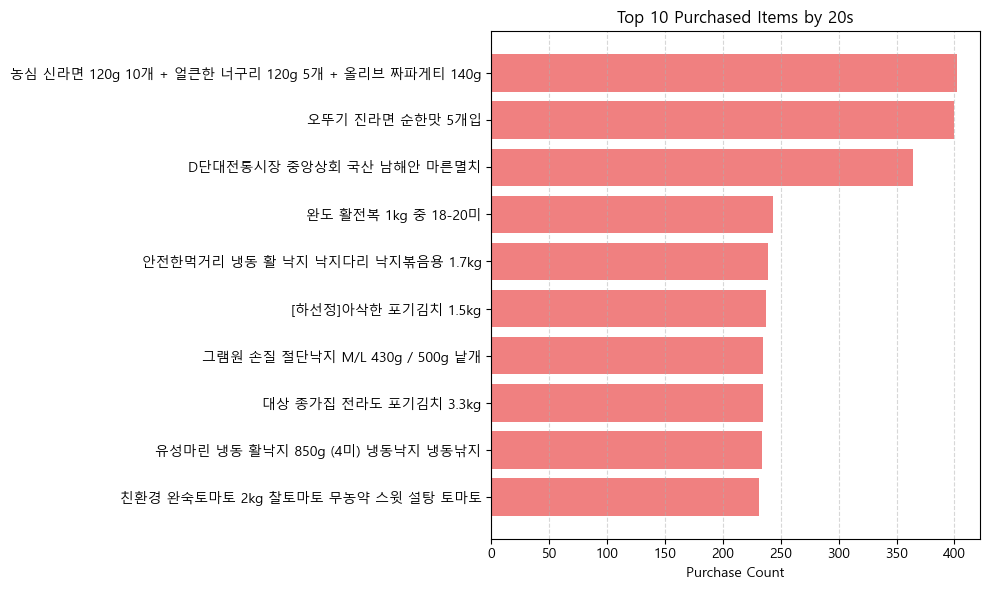

In [173]:
import matplotlib.pyplot as plt

# 값과 라벨 분리
labels = top_items_20s.index
counts = top_items_20s.values

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='lightcoral')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Items by 20s')
plt.gca().invert_yaxis()  # 가장 많이 산 상품이 위에 오게 설정
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [83]:
# 관심 있는 상품 리스트
target_items = ['냉동', '사과', '고구마']  # 예시

# 선행 또는 결과 항목에 포함된 모든 규칙 필터링
rules_filtered = rules_20s[
    rules_20s['antecedents'].apply(lambda x: any(item in x for item in target_items)) |
    rules_20s['consequents'].apply(lambda x: any(item in x for item in target_items))
]

# 결과 보기
rules_filtered = rules_filtered.sort_values(by='lift', ascending=False)
rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
222,(고구마),"(냉동, 커피)",0.011733,0.051106,1.121551
221,"(냉동, 커피)",(고구마),0.011733,0.257491,1.121551
218,"(사과, 고구마)",(냉동),0.017856,0.354061,1.098336
219,(냉동),"(사과, 고구마)",0.017856,0.055390,1.098336
6,(드레싱),(고구마),0.010581,0.248124,1.080753
7,(고구마),(드레싱),0.010581,0.046088,1.080753
23,(고구마),(소시지),0.013184,0.057424,1.067335
22,(소시지),(고구마),0.013184,0.245044,1.067335
100,(키위),(냉동),0.036842,0.343067,1.064232
101,(냉동),(키위),0.036842,0.114288,1.064232


In [165]:
import pandas as pd

df_clean = pd.read_csv('./data/df_clean.csv')  # 경로 조정

# 🎯 20대 여성 필터링
df_filtered = df_clean[(df_clean['Gender'] == 'F') & (df_clean['AgeGroup'] == '20대')]

# 타겟 상품
target_items = ['농심 신라면 120g', '얼큰한 너구리 120g', '올리브 짜파게티 140g']

# 주문별 장바구니 구성
basket = df_filtered.groupby('idOrder')['ItemName'].apply(list).reset_index()

# 타겟 포함 여부
basket['contains_all_targets'] = basket['ItemName'].apply(lambda x: all(item in x for item in target_items))

# 타겟 포함 주문만 추출
filtered_orders = basket[basket['contains_all_targets']]

# 💡 리스트 컬럼을 다시 explode할 때는, 따로 접근해야 함
target_baskets = filtered_orders['ItemName'].explode()

# 타겟 상품 제외한 상품만 필터링
co_purchased = target_baskets[~target_baskets.isin(target_items)]

# 상품별 빈도 집계
co_purchased_counts = co_purchased.value_counts().reset_index()
co_purchased_counts.columns = ['ItemName', 'Count']

# 결과 출력
print("💡 20대 여성이 라면 3종과 함께 구매한 Top 10 상품:")
print(co_purchased_counts.head(10))


KeyError: 'ItemName'

## 30대

In [105]:
df_30s = df_clean[df_clean['AgeGroup'] == '30대']

# 주문별 소분류 상품 리스트로 묶기
basket_30s = df_30s.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# TransactionEncoder로 이진 매트릭스 변환
te = TransactionEncoder()
te_ary = te.fit(basket_30s['ItemSmallName']).transform(basket_30s['ItemSmallName'])
df_encoded_30s = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘 적용
frequent_itemsets_30s = apriori(df_encoded_30s, min_support=0.01, use_colnames=True)

# 연관 규칙 도출
rules_30s = association_rules(frequent_itemsets_20s, metric="lift", min_threshold=1.0)

# 결과 확인
rules_30s = rules_30s.sort_values(by='lift', ascending=False)
rules_30s[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
65,(김치),(멸치),0.010859,0.057415,1.095836
64,(멸치),(김치),0.010859,0.207250,1.095836
121,(딸기),(라면),0.010239,0.108597,1.090943
120,(라면),(딸기),0.010239,0.102862,1.090943
117,(커피),(도라지),0.010226,0.066387,1.083496
116,(도라지),(커피),0.010226,0.166891,1.083496
226,"(냉동, 김)",(고구마),0.010487,0.239472,1.073164
227,(고구마),"(냉동, 김)",0.010487,0.046996,1.073164
127,(라면),(상추),0.014341,0.144062,1.067913
126,(상추),(라면),0.014341,0.106305,1.067913


In [109]:
# 30대의 소분류별 구매 건수 집계
top_items_30s = df_30s['ItemSmallName'].value_counts().head(10)
print(top_items_30s)

ItemSmallName
냉동     27405
사과     21160
고구마    17929
토마토    16080
김치     14928
즉석     12695
커피     12118
김      11652
고등어    11560
상추     10373
Name: count, dtype: int64


In [175]:
# 30대의 구매상품 건수 집계
top_items_30s = df_30s['ItemName'].value_counts().head(10)
print(top_items_30s)

ItemName
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    402
오뚜기 진라면 순한맛 5개입                                      400
D단대전통시장 중앙상회 국산 남해안 마른멸치                             364
완도 활전복 1kg 중 18-20미                                  243
안전한먹거리 냉동 활 낙지 낙지다리 낙지볶음용 1.7kg                      239
[하선정]아삭한 포기김치 1.5kg                                  237
그램원 손질 절단낙지 M/L 430g / 500g 낱개                       235
대상 종가집 전라도 포기김치 3.3kg                                235
유성마린 냉동 활낙지 850g (4미) 냉동낙지 냉동낚지                      234
친환경 완숙토마토 2kg 찰토마토 무농약 스윗 설탕 토마토                     231
Name: count, dtype: int64


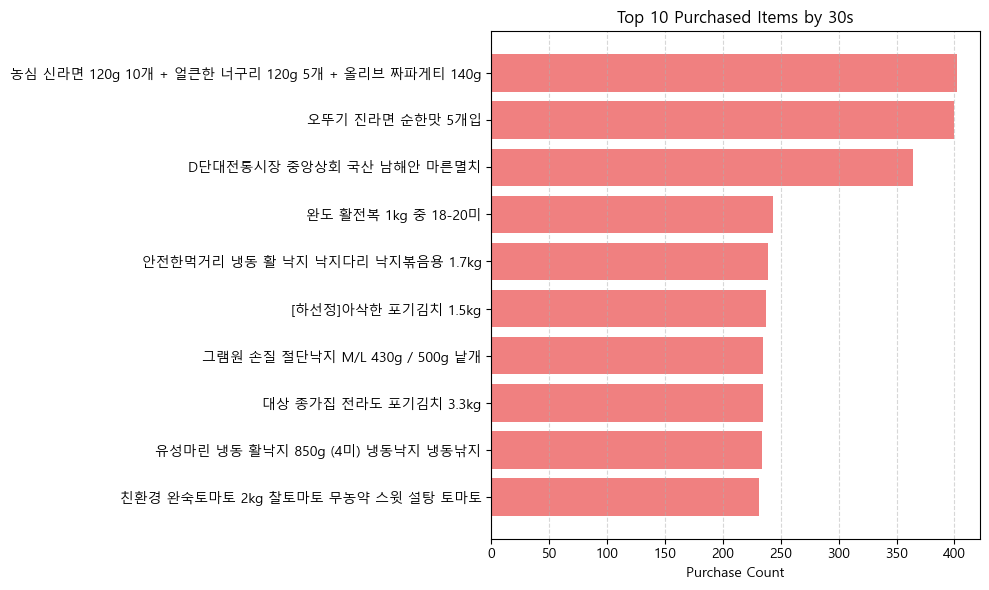

In [177]:
import matplotlib.pyplot as plt

# 값과 라벨 분리
labels = top_items_30s.index
counts = top_items_30s.values

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='lightcoral')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Items by 30s')
plt.gca().invert_yaxis()  # 가장 많이 산 상품이 위에 오게 설정
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 40대

In [118]:
# 40대 데이터만 필터링
df_40s = df_clean[df_clean['AgeGroup'] == '40대']

# 주문별 소분류 상품 리스트화
basket_40s = df_40s.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# TransactionEncoder로 이진 매트릭스로 변환
te = TransactionEncoder()
te_ary = te.fit(basket_40s['ItemSmallName']).transform(basket_40s['ItemSmallName'])
df_encoded_40s = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘 적용
frequent_itemsets_40s = apriori(df_encoded_40s, min_support=0.01, use_colnames=True)

# 연관 규칙 추출
rules_40s = association_rules(frequent_itemsets_40s, metric="lift", min_threshold=1.0)

# 결과 정렬 및 출력
rules_40s = rules_40s.sort_values(by='lift', ascending=False)
rules_40s[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
224,(토마토),"(냉동, 커피)",0.010520,0.052037,1.173847
223,"(냉동, 커피)",(토마토),0.010520,0.237316,1.173847
56,(김),(파),0.020932,0.141041,1.141164
57,(파),(김),0.020932,0.169357,1.141164
209,(고구마),"(냉동, 커피)",0.011282,0.050250,1.133555
208,"(냉동, 커피)",(고구마),0.011282,0.254501,1.133555
84,(스낵),(낙지),0.011246,0.107901,1.125815
85,(낙지),(스낵),0.011246,0.117335,1.125815
42,(사과),(국수),0.012225,0.046573,1.118313
43,(국수),(사과),0.012225,0.293554,1.118313


In [120]:
# 40대의 구매상품 건수 집계
top_items_40s = df_40s['ItemName'].value_counts().head(10)
print(top_items_40s)

ItemName
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    228
오뚜기 진라면 순한맛 5개입                                      170
D단대전통시장 중앙상회 국산 남해안 마른멸치                             150
대추방울토마토 750g/팩                                       105
[펩시] 콜라 (1.8L/펫)                                     104
목포 세발낙지 신안 뻘낙지 무안 산낙지 활낙지 국산낙지 낙지볶음                  102
[꿈꿀마을] 황토 해남꿀고구마 2kg 대 (300g이상)                       99
마당발 냉동대파 (슬라이스 중국산 1kg)  2개                           98
국내산 손질 갑오징어 300g 2개 급속냉동 생물에 가까운 -60도                 97
종가집 포기김치1kg x2개 + 총각김치900g x1개 (냉장)                   97
Name: count, dtype: int64


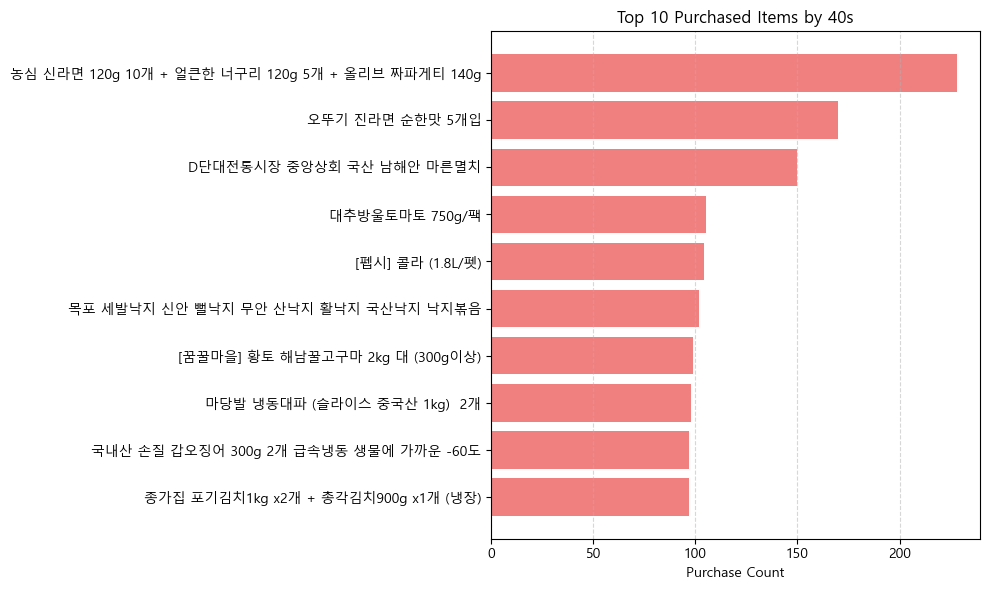

In [186]:
import matplotlib.pyplot as plt

# 값과 라벨 분리
labels = top_items_40s.index
counts = top_items_40s.values

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='lightcoral')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Items by 40s')
plt.gca().invert_yaxis()  # 가장 많이 산 상품이 위에 오게 설정
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 50대

In [125]:
# 50대 데이터만 필터링
df_50s = df_clean[df_clean['AgeGroup'] == '50대']

# 주문별 소분류 상품 리스트화
basket_50s = df_50s.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# TransactionEncoder로 이진 매트릭스로 변환
te = TransactionEncoder()
te_ary = te.fit(basket_50s['ItemSmallName']).transform(basket_50s['ItemSmallName'])
df_encoded_50s = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘 적용
frequent_itemsets_50s = apriori(df_encoded_50s, min_support=0.01, use_colnames=True)

# 연관 규칙 추출
rules_50s = association_rules(frequent_itemsets_50s, metric="lift", min_threshold=1.0)

# 결과 정렬 및 출력
rules_50s = rules_50s.sort_values(by='lift', ascending=False)
rules_50s[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
215,(커피),(풋고추),0.012339,0.079329,1.176117
214,(풋고추),(커피),0.012339,0.182938,1.176117
118,(토마토),(드레싱),0.010144,0.050502,1.169386
119,(드레싱),(토마토),0.010144,0.234890,1.169386
155,(밤),(토마토),0.015661,0.233010,1.160025
154,(토마토),(밤),0.015661,0.077968,1.160025
56,(김),(풋고추),0.011627,0.078088,1.157716
57,(풋고추),(김),0.011627,0.172383,1.157716
74,(김치),(잼),0.019221,0.103053,1.143629
75,(잼),(김치),0.019221,0.213298,1.143629


In [127]:
# 50대의 구매상품 건수 집계
top_items_50s = df_50s['ItemName'].value_counts().head(10)
print(top_items_50s)

ItemName
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    99
D단대전통시장 중앙상회 국산 남해안 마른멸치                             92
[펩시] 콜라 (1.8L/펫)                                     66
[해미래 ] 국내산 손질 냉동 오징어 270g 내외 (2마리) x 2팩              65
농협과일 국내산 골드키위 3kg 40과내                               64
낙지호롱 900g 20-25개 낙지꼬치구이 냉동낙지 (양념소스70gx1팩 제공)         63
[프레쉬팜] 달달 배 선물세트 2호 3.5kg(6과)                        62
제철 손질 갑오징어 개별포장 마리당 200g ~ 400g 몸통 몸통살               61
[유학산김치] 유학산 포기김치 3kg / 100% 국내산재료 / 아이스박스포장          60
국내산 고등어필렛 70-100g 20팩                                60
Name: count, dtype: int64


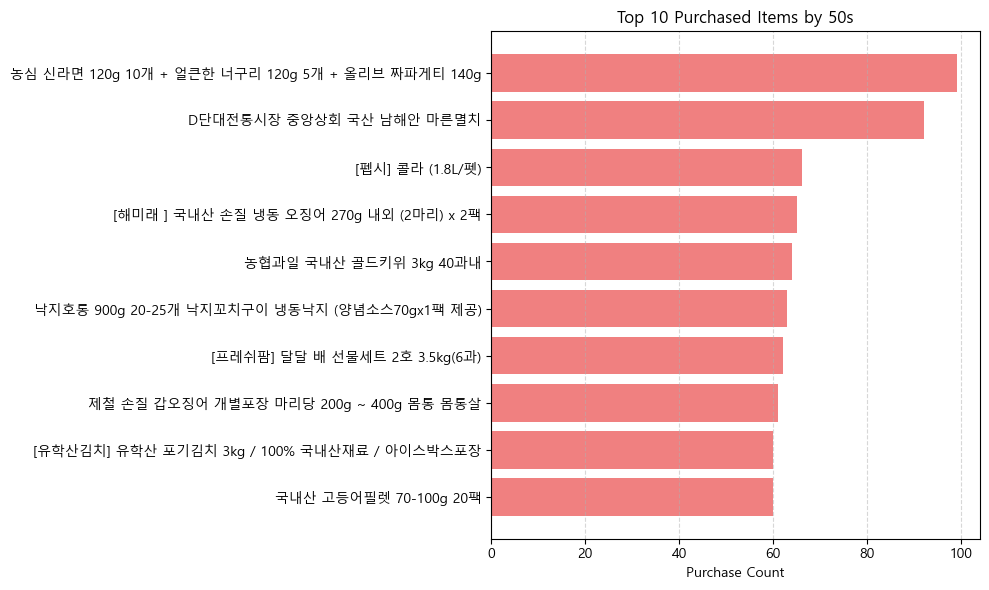

In [184]:
import matplotlib.pyplot as plt

# 값과 라벨 분리
labels = top_items_50s.index
counts = top_items_50s.values

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='lightcoral')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Items by 50s')
plt.gca().invert_yaxis()  # 가장 많이 산 상품이 위에 오게 설정
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 60대

In [136]:
# 60대 데이터만 필터링
df_60s = df_clean[df_clean['AgeGroup'] == '60대']

# 주문별 소분류 상품 리스트화
basket_60s = df_60s.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# TransactionEncoder로 이진 매트릭스로 변환
te = TransactionEncoder()
te_ary = te.fit(basket_60s['ItemSmallName']).transform(basket_60s['ItemSmallName'])
df_encoded_60s = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori 알고리즘 적용
frequent_itemsets_60s = apriori(df_encoded_60s, min_support=0.01, use_colnames=True)

# 연관 규칙 추출
rules_60s = association_rules(frequent_itemsets_60s, metric="lift", min_threshold=1.0)

# 결과 정렬 및 출력
rules_60s = rules_50s.sort_values(by='lift', ascending=False)
rules_60s[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


,antecedents,consequents,support,confidence,lift
215,(커피),(풋고추),0.012339,0.079329,1.176117
214,(풋고추),(커피),0.012339,0.182938,1.176117
118,(토마토),(드레싱),0.010144,0.050502,1.169386
119,(드레싱),(토마토),0.010144,0.234890,1.169386
155,(밤),(토마토),0.015661,0.233010,1.160025
154,(토마토),(밤),0.015661,0.077968,1.160025
56,(김),(풋고추),0.011627,0.078088,1.157716
57,(풋고추),(김),0.011627,0.172383,1.157716
74,(김치),(잼),0.019221,0.103053,1.143629
75,(잼),(김치),0.019221,0.213298,1.143629


In [138]:
# 60대의 구매상품 건수 집계
top_items_60s = df_60s['ItemName'].value_counts().head(10)
print(top_items_60s)

ItemName
농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g    73
오뚜기 진라면 순한맛 5개입                                      56
고등어 400g 5캔                                          36
국산 고흥 산낙지 낙지 뻘낙지 활낙지 중 5마리                           34
해남 호박고구마 3kg (특상/100~280g)                           34
D단대전통시장 중앙상회 국산 남해안 마른멸치                             34
Thrive Market Chives 스라이브 마켓 차이브 쪽파 6g               33
(민수팜)당일수확 신선하고 맛있는 수박 5kg *택배 상품*                    32
낙지호롱(낙지 꼬치) 900g                                     32
(모들채소) 국산 한입 햇 밤고구마 1kg 1팩                           32
Name: count, dtype: int64


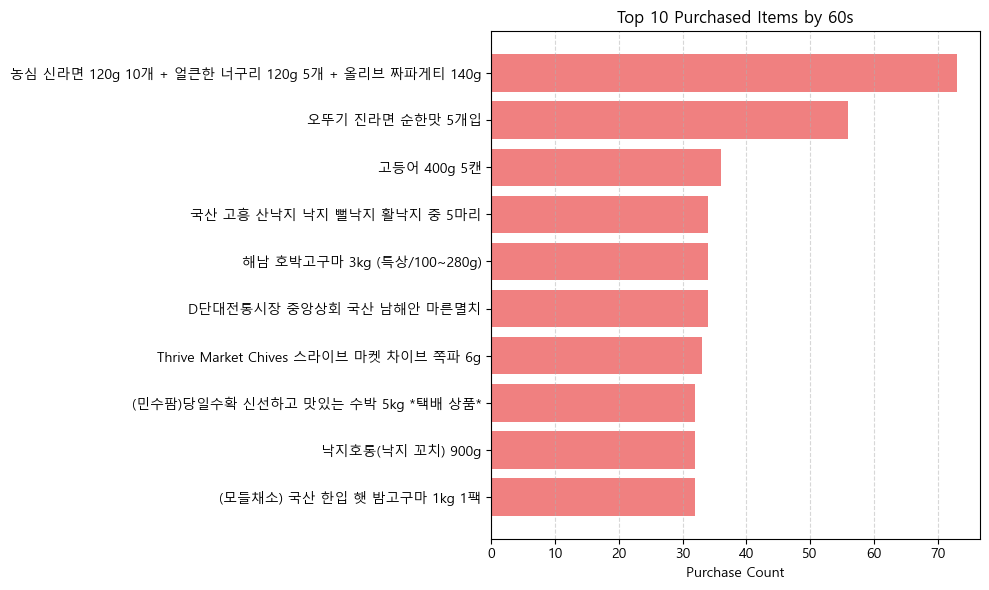

In [181]:
import matplotlib.pyplot as plt

# 값과 라벨 분리
labels = top_items_60s.index
counts = top_items_60s.values

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, counts, color='lightcoral')
plt.xlabel('Purchase Count')
plt.title('Top 10 Purchased Items by 60s')
plt.gca().invert_yaxis()  # 가장 많이 산 상품이 위에 오게 설정
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# 사용자의 분포

In [58]:
df_clean[['idUser', 'AgeGroup']].drop_duplicates()['AgeGroup'].value_counts()


AgeGroup
30대    1280
20대     820
40대     477
50대     291
60대     132
Name: count, dtype: int64

In [12]:
# 연령대별 규칙 수
print(result_df['Age_group'].value_counts())

# 연령대별 평균 lift & confidence
print(result_df.groupby('Age_group')[['lift', 'confidence']].mean().sort_values(by='lift', ascending=False))


Age_group
60대 이상    782
50대       684
30대       654
40대       652
20대       608
Name: count, dtype: int64
               lift  confidence
Age_group                      
60대 이상     1.112792    0.132576
50대        1.070137    0.130256
40대        1.058300    0.130128
20대        1.042522    0.130565
30대        1.039707    0.133419


In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 데이터 불러오기
#df = pd.read_csv("./data/df_merged.csv")

# 주문 단위로 상품 리스트 만들기
basket = df_merged.groupby('idOrder')['ItemSmallName'].apply(list).reset_index()

# One-hot 인코딩
te = TransactionEncoder()
te_ary = te.fit(basket['ItemSmallName']).transform(basket['ItemSmallName'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 자주 나오는 상품 조합 찾기
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

# 연관 규칙 추출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 규칙 해석에 유용한 컬럼만 보기
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(20)


,antecedents,consequents,support,confidence,lift
561,(키위),"(냉동, 김)",0.005174,0.048459,1.103685
560,"(냉동, 김)",(키위),0.005174,0.117842,1.103685
148,(호박),(나물),0.005098,0.037708,1.101440
149,(나물),(호박),0.005098,0.148918,1.101440
521,(냉동),"(키위, 고구마)",0.006842,0.020925,1.088665
520,"(키위, 고구마)",(냉동),0.006842,0.355994,1.088665
502,"(미역, 냉동)",(고구마),0.005787,0.236924,1.085904
503,(고구마),"(미역, 냉동)",0.005787,0.026522,1.085904
226,(미역),(딸기),0.008563,0.101634,1.083398
227,(딸기),(미역),0.008563,0.091282,1.083398


In [14]:
basket

,idOrder,ItemSmallName
0,U10001-O2022-1001,"[전복, 김치, 냉동, 치즈, 낙지, 과일, 토마토]"
1,U10001-O2022-1002,"[전복, 즉석, 냉동, 사과]"
2,U10001-O2022-1003,"[토마토, 사과, 라면, 김]"
3,U10001-O2022-1004,"[딸기, 생수, 밤, 사과]"
4,U10001-O2022-1005,"[빵, 호박, 냉동, 파프리카, 드레싱, 스낵, 즉석]"
...,...,...
171426,U13000-O2024-1016,"[호박, 상추, 키위, 전복, 미역, 빵]"
171427,U13000-O2024-1017,"[호박, 딸기, 즉석, 잼, 냉동]"
171428,U13000-O2024-1018,"[혼합음료, 풋고추, 파, 소시지, 과일]"
171429,U13000-O2024-1019,"[낙지, 사과, 치즈, 김]"


In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 주문 단위로 상품 리스트 만들기
basket = df_merged.groupby('idOrder')['ItemMiddleName'].apply(list).reset_index()

# One-hot 인코딩
te = TransactionEncoder()
te_ary = te.fit(basket['ItemMiddleName']).transform(basket['ItemMiddleName'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 자주 나오는 상품 조합 찾기
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

# 연관 규칙 추출
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 규칙 해석에 유용한 컬럼만 보기
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(20)


,antecedents,consequents,support,confidence,lift
78,"(곡물, 냉동)","(과일, 채소)",0.044315,0.441019,1.050280
79,"(과일, 채소)","(곡물, 냉동)",0.044315,0.105536,1.050280
22,(커피),(신선),0.030292,0.196281,1.046255
23,(신선),(커피),0.030292,0.161469,1.046255
45,(곡물),"(채소, 신선)",0.038184,0.111846,1.043020
44,"(채소, 신선)",(곡물),0.038184,0.356090,1.043020
48,"(곡물, 즉석)",(채소),0.035192,0.673777,1.037718
49,(채소),"(곡물, 즉석)",0.035192,0.054201,1.037718
77,(채소),"(냉동, 커피)",0.030304,0.046672,1.036007
76,"(냉동, 커피)",(채소),0.030304,0.672666,1.036007


In [16]:
# lift 기준으로 내림차순 정렬
rules_sorted = rules.sort_values(by='lift', ascending=False)

# 상위 20개만 보기
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

,antecedents,consequents,support,confidence,lift
78,"(곡물, 냉동)","(과일, 채소)",0.044315,0.441019,1.050280
79,"(과일, 채소)","(곡물, 냉동)",0.044315,0.105536,1.050280
22,(커피),(신선),0.030292,0.196281,1.046255
23,(신선),(커피),0.030292,0.161469,1.046255
45,(곡물),"(채소, 신선)",0.038184,0.111846,1.043020
44,"(채소, 신선)",(곡물),0.038184,0.356090,1.043020
48,"(곡물, 즉석)",(채소),0.035192,0.673777,1.037718
49,(채소),"(곡물, 즉석)",0.035192,0.054201,1.037718
77,(채소),"(냉동, 커피)",0.030304,0.046672,1.036007
76,"(냉동, 커피)",(채소),0.030304,0.672666,1.036007


In [17]:
# lift와 confidence 기준 필터링
rules_filtered = rules[
    (rules['lift'] > 1.1) &
    (rules['confidence'] > 0.3)
]

# lift 기준 정렬
rules_filtered_sorted = rules_filtered.sort_values(by='lift', ascending=False)

# 상위 20개 보기
rules_filtered_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)


,antecedents,consequents,support,confidence,lift


# 멤버십 가입비율확인

In [19]:
# 멤버십 가입 여부 값 확인 (예: 'Y', 'N')
print(df_merged['MemberYN'].value_counts())

# 고유 사용자 기준으로 중복 제거 (회원 수를 사용자 단위로 계산)
members = df_merged[['idUser', 'MemberYN']].drop_duplicates()

# 가입률 계산
total_users = members.shape[0]
member_count = members[members['MemberYN'] == 'Y'].shape[0]
membership_rate = member_count / total_users * 100

print(f"전체 사용자 수: {total_users}")
print(f"멤버십 가입자 수: {member_count}")
print(f"멤버십 가입률: {membership_rate:.2f}%")


MemberYN
Y    614152
N    242575
Name: count, dtype: int64
전체 사용자 수: 3000
멤버십 가입자 수: 2155
멤버십 가입률: 71.83%


In [20]:
# 멤버십 여부별 총 매출
sales_by_membership = df_merged.groupby('MemberYN')['Price'].sum().reset_index()
sales_by_membership.columns = ['MemberYN', 'Total_Sales']
sales_by_membership

,MemberYN,Total_Sales
0,N,3739929120
1,Y,9467947610


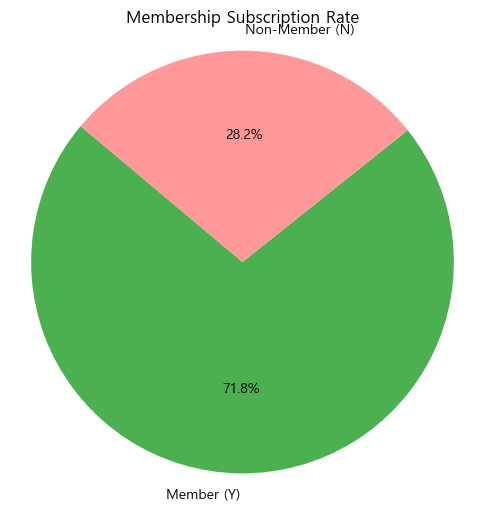

전체 사용자 수: 3000
멤버십 가입자 수: 2155
멤버십 가입률: 71.83%


In [190]:
import pandas as pd
import matplotlib.pyplot as plt

# 고유 사용자 단위로 중복 제거
members = df_clean[['idUser', 'MemberYN']].drop_duplicates()

# 가입 여부별 사용자 수 계산
member_count = members[members['MemberYN'] == 'Y'].shape[0]
non_member_count = members[members['MemberYN'] == 'N'].shape[0]
total_users = member_count + non_member_count

# 파이차트 구성
labels = ['Member (Y)', 'Non-Member (N)']
sizes = [member_count, non_member_count]
colors = ['#4CAF50', '#FF9999']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Membership Subscription Rate')
plt.axis('equal')  # 원형 유지

plt.show()

# 추가적으로 숫자도 출력
print(f"전체 사용자 수: {total_users}")
print(f"멤버십 가입자 수: {member_count}")
print(f"멤버십 가입률: {member_count / total_users * 100:.2f}%")


In [194]:
# 사용자 단위로 집계
user_sales = df_merged.groupby(['idUser', 'MemberYN'])['Price'].sum().reset_index()

# 멤버십 여부별 평균 매출
avg_sales_by_membership = user_sales.groupby('MemberYN')['Price'].mean().reset_index()
avg_sales_by_membership.columns = ['MemberYN', 'Avg_User_Sales']
avg_sales_by_membership

,MemberYN,Avg_User_Sales
0,N,4.425952e+06
1,Y,4.393479e+06


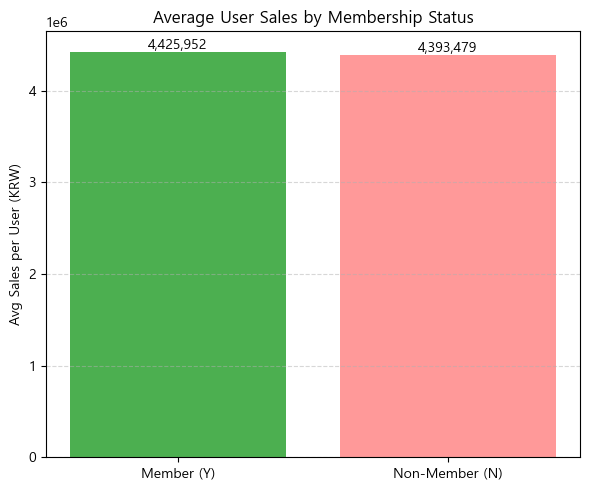

In [196]:
import matplotlib.pyplot as plt

# 값 준비
labels = avg_sales_by_membership['MemberYN']
values = avg_sales_by_membership['Avg_User_Sales']

# 막대그래프 생성
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color=['#4CAF50', '#FF9999'])

# 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=10)

# 레이블 및 제목
plt.ylabel('Avg Sales per User (KRW)')
plt.title('Average User Sales by Membership Status')
plt.xticks(ticks=[0, 1], labels=['Member (Y)', 'Non-Member (N)'])
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [22]:
# 사용자별 구매 횟수 계산
user_orders = df_merged.groupby(['idUser', 'MemberYN'])['idOrder'].nunique().reset_index()
user_orders.columns = ['idUser', 'MemberYN', 'User_Purchase_Count']

# 멤버십 여부별 평균 구매 횟수
avg_purchase_count = user_orders.groupby('MemberYN')['User_Purchase_Count'].mean().reset_index()
avg_purchase_count.columns = ['MemberYN', 'Avg_Purchase_Count']

In [20]:
import pandas as pd

# 통합된 데이터 불러오기
df = pd.read_csv("./data/df_clean.csv")

# OrderDT가 datetime 형태가 아니라면 변환 (이미 되어 있으면 생략 가능)
df['OrderDT'] = pd.to_datetime(df['OrderDT'], errors='coerce')

# 요일 추출
df['OrderDay'] = df['OrderDT'].dt.day_name()

# 요일별 상품 주문 건수 집계
order_counts_by_day_item = df.groupby(['OrderDay', 'ItemCode', 'ItemName']).size().reset_index(name='OrderCount')

# 요일별 최다 주문 상품 추출
top_items_by_day = order_counts_by_day_item.sort_values(['OrderDay', 'OrderCount'], ascending=[True, False]) \
                                           .groupby('OrderDay').first().reset_index()

# 결과 출력
print("📦 요일별 최다 주문 상품:")
display(top_items_by_day[['OrderDay', 'ItemName', 'OrderCount']])


📦 요일별 최다 주문 상품:


,OrderDay,ItemName,OrderCount
0,Friday,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,193
1,Monday,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,140
2,Saturday,[피쉬셀]제주갈치살 250g 냉동,11
3,Sunday,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,197
4,Thursday,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,196
5,Tuesday,농심 신라면 120g 10개 + 얼큰한 너구리 120g 5개 + 올리브 짜파게티 140g,190
6,Wednesday,D단대전통시장 중앙상회 국산 남해안 마른멸치,226
